<a href="https://colab.research.google.com/github/ShoaibSheriff/Computer-Vision/blob/master/Action%20Spotting/Random_AVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df_asd = pd.read_csv(r"C:\Users\Shoaib\Desktop\ava\ava-human-searches_anno.csv")

In [0]:
act_list = ["bend/bow (at the waist)", "crawl", "crouch/kneel", "dance", "fall down", "get up", "jump/leap", "lie/sleep", "martial art", "run/jog", "sit", "stand", "swim", "walk", "answer phone", "brush teeth", "carry/hold (an object)", "catch (an object)", "chop", "climb (e.g., a mountain)", "clink glass", "close (e.g., a door, a box)", "cook", "cut", "dig", "dress/put on clothing", "drink", "drive (e.g., a car, a truck)", "eat", "enter", "exit", "extract", "fishing", "hit (an object)", "kick (an object)", "lift/pick up", "listen (e.g., to music)", "open (e.g., a window, a car door)", "paint", "play board game", "play musical instrument", "play with pets", "point to (an object)", "press", "pull (an object)", "push (an object)", "put down", "read", "ride (e.g., a bike, a car, a horse)", "row boat", "sail boat", "shoot", "shovel", "smoke", "stir", "take a photo", "text on/look at a cellphone", "throw", "touch (an object)", "turn (e.g., a screwdriver)", "watch (e.g., TV)", "work on a computer", "write", "fight/hit (a person)", "give/serve (an object) to (a person)", "grab (a person)", "hand clap", "hand shake", "hand wave", "hug (a person)", "kick (a person)", "kiss (a person)", "lift (a person)", "listen to (a person)", "play with kids", "push (another person)", "sing to (e.g., self, a person, a group)", "take (an object) from (a person)", "talk to (e.g., self, a person, a group)", "watch (a person)"]

In [0]:
act_dict = {}
for i in range(len(act_list)) :
    act_dict[i+1] = act_list[i]


In [0]:
act_dict['crawl']

In [0]:
df_asd.head(5)

In [0]:
len(df_asd['target-action'].unique())

20

In [0]:
actions_considered = df_asd['target-action'].unique()

In [0]:
videos_considered = df_asd['video-id'].unique()

In [0]:
df_asd['video-id'].unique()

array(['Ag-pXiLrd48', 'Db19rWN5BGo', 'xO4ABy2iOQA', 'lWXhqIAvarw',
       'pLJ7bC5Vcqw', 'Ecivp8t3MdY', 'r2llOyS-BmE', 'cKA-qeZuH_w',
       'O_NYCUhZ9zw', 'HJzgJ9ZjvJk', '9F2voT6QWvQ', 'tghXjom3120',
       '_mAfwH6i90E', 'XV_FF3WC7kA', 'AYebXQ8eUkM', 'J1jDc2rTJlg',
       '5BDj0ow5hnA', 'T-Fc9ctuNVI', 'KWoSGtglCms', '-FaXLcSFjUI',
       'VsYPP2I0aUQ', 'qx2vAO5ofmo', 'sUVhd0YTKgw', 'Ma2hgTmveKQ',
       'F3dPH6Xqf5M', 'UIy730JrFIc', 'uNT6HrrnqPU', 'Ov0za6Xb1LM',
       'o4xQ-BEa3Ss', 'xmqSaQPzL1E', 'HymKCzQJbB8', 'YYWdB7h1INo',
       'hbYvDvJrpNk', 'N7baJsMszJ0', 'fpprSy6AzKk', 'u1ltv6r14KQ',
       'b5pRYl_djbs', 'Kb1fduj-jdY', 'CZ2NP8UsPuE', 'jqZpiHlJUig',
       'y7ncweROe9U', 'N5UD8FGzDek', 'l-jxh8gpxuY', 'rUYsoIIE37A',
       'plkJ45_-pMk', 'OfMdakd4bHI', '9mLYmkonWZQ', 'rFgb2ECMcrY',
       'OGNnUvJq9RI', 'x-6CtPWVi6E', 'UgZFdrNT6W0', '20TAGRElvfE',
       '914yZXz-iRs', 'B1MAUxpKaV8', 'skiZueh4lfY', '2fwni_Kjf2M',
       '4gVsDd8PV9U', 'lT1zdTL-3SM', 'vfjywN5CN0Y', 'S0tkhGJjw

In [0]:
# df_asd[(df_asd['video-id'] == '053oq2xB3oU')]['search-id'].unique()

In [0]:
# For particular video
# for video in videos :
#     df_asd_video = df_asd[(df_asd['video-id'] == video)]
# #         For particular action
#     df_asd_video_actions = df_asd_video['target-action'].unique()
#     for action in df_asd_video_actions :
#         print(act_dict[action])

# Random Baseline

In [0]:
df_ava_test = pd.read_csv(r"C:\Users\Shoaib\Desktop\ava\ava_test_v1.0_v.csv", names  = ['video_id', 'middle_frame_timestamp', 'x1', 'y1', 'x2', 'y2', 'action_id'])

In [0]:
df_ava_test.head(5)

,video_id,middle_frame_timestamp,x1,y1,x2,y2,action_id
0,053oq2xB3oU,904,0.061,0.168,0.774,0.877,11
1,053oq2xB3oU,904,0.302,0.242,0.560,0.657,12
2,053oq2xB3oU,904,0.661,0.241,0.894,0.857,11
3,053oq2xB3oU,904,0.837,0.221,0.991,0.858,12
4,053oq2xB3oU,907,0.000,0.201,0.313,0.964,12


In [0]:
MIN = df_ava_test.middle_frame_timestamp.min()

In [0]:
MIN

904

In [0]:
MAX = df_ava_test.middle_frame_timestamp.max()

In [0]:
MAX

1798

In [0]:
import random

def find_action(dataf) :    
    
    search_num = 1;
    
    for i in range(500) :
        guess_time = random.randint(MIN, MAX)
        if guess_time in dataf:
            break;
        if (guess_time - 1 in dataf) & (guess_time + 2 in dataf):
            break;
        if (guess_time - 2 in dataf) & (guess_time + 1 in dataf):
            break;
        else :
            search_num = search_num + 1
    
    return search_num

In [0]:
actions = df_ava_test['action_id'].unique()

In [0]:
len(actions)

76

In [0]:
for action in actions :
    print('Action', act_dict[action])

    df_ava_test_action = df_ava_test[(df_ava_test['action_id'] == action)]
    epochs = 100
    
    total = 0;
    count = 0;
    
    for epoch in range(epochs) :
        
        videos_with_action = df_ava_test_action['video_id'].unique()
        # For particular video
        for video in videos_with_action :
            df_ava_video_action = df_ava_test_action[(df_ava_test_action['video_id'] == video) & (df_ava_test_action['action_id'] == action)]
    
#             print('Video', video)

            as_metric = 500
            while (as_metric == 500) :
                as_metric = find_action(df_ava_video_action['middle_frame_timestamp'].tolist())

#             print('Action : %s , Spotted in : %i' % (act_dict[action], as_metric))
            total = total + as_metric
            count = count + 1
    print('avg', total/count)

Action sit
avg 3.666315789473684
Action stand
avg 2.840263157894737
Action watch (a person)
avg 13.592105263157896
Action sing to (e.g., self, a person, a group)
avg 219.815
Action talk to (e.g., self, a person, a group)
avg 2.954473684210526
Action listen to (a person)
avg 6.439736842105263
Action walk
avg 23.541315789473686
Action carry/hold (an object)
avg 7.261315789473684
Action read
avg 167.67
Action write
avg 217.29181818181817
Action bend/bow (at the waist)
avg 103.4771052631579
Action watch (e.g., TV)
avg 248.3241176470588
Action run/jog
avg 209.6211111111111
Action touch (an object)
avg 178.0621875
Action hit (an object)
avg 311.35
Action get up
avg 278.5932352941176
Action lift/pick up
avg 272.36571428571426
Action push (an object)
avg 344.02285714285716
Action lie/sleep
avg 130.40047619047618
Action fight/hit (a person)
avg 185.77
Action grab (a person)
avg 185.02935483870968
Action hug (a person)
avg 188.2521052631579
Action push (another person)
avg 329.1972727272727
Acti

In [0]:
avg/count

199.22424242424242

# Direction

In [0]:
# import torchvision.models as models
# resnet50 = models.resnet50(pretrained=True)

In [0]:
# import torch
# import torch.nn as nn

# resnet = nn.Sequential(resnet50, nn.Sequential(nn.Linear(1000,2), nn.Softmax()))

In [0]:
# resnet

In [0]:
# from torchsummary import summary
# summary(resnet, (3, 224, 224))

In [0]:
df_dummy = pd.read_csv(r"C:\Users\Shoaib\Desktop\ava\ava_working_train_ids.csv", names  = ['ids'], index_col = False)

In [0]:
df_dummy.head(5)

,ids
0,55Ihr6uVIDA
1,HymKCzQJbB8
2,K_SpqDJnlps
3,32HR3MnDZ8g
4,KVq6If6ozMY


In [0]:
working_video_ids = df_dummy['ids'].unique()

In [0]:
df_ava_train = pd.read_csv(r"C:\Users\Shoaib\Desktop\ava\ava_train_v1.0_v.csv", names  = ['video_id', 'middle_frame_timestamp', 'x1', 'y1', 'x2', 'y2', 'action_id'])

In [0]:
df_ava_train_working_only = df_ava_train[(df_ava_train['video_id'].isin(working_video_ids))]

In [0]:
df_ava_train_working_only.to_csv(r"C:\Users\Shoaib\Desktop\ava\ava_train_v1.0_v_working_only.csv", index=False, header=False);

In [0]:
len(df_ava_train_working_only)

125042

In [0]:
df_asd_train = pd.read_csv(r"C:\Users\Shoaib\Desktop\ava\ava-human-searches_anno.csv")

In [0]:
allowed_actions = df_asd_train['target-action'].unique()
for i in range(len(allowed_actions)) :
    allowed_actions[i] = act_dict[allowed_actions[i]]

In [0]:
allowed_actions

array([21, 27, 4, 70, 77, 67, 56, 41, 54, 72, 68, 13, 7, 29, 28, 63, 52,
       9, 76, 62], dtype=object)

In [0]:
allowed_videos = df_asd_train['video-id'].unique()

In [0]:
df_ava_train_working_only = df_ava_train_working_only[df_ava_train_working_only['action_id'].isin(allowed_actions)]

In [0]:
df_ava_train_working_only = df_ava_train_working_only[df_ava_train_working_only['video_id'].isin(allowed_videos)]

In [0]:
len(df_ava_train_working_only)

4940

In [0]:
df_actions_i = []
for i in range(len(allowed_actions)) :
    df_actions_i.append(df_ava_train_working_only[df_ava_train_working_only['action_id'] == allowed_actions[i]])

In [0]:
sum = 0;
for i in range(len(allowed_actions)) :
    sum += len(df_actions_i[i])
sum

4940

In [0]:
X_action_i = []
videos_action_i =  df_actions_i[0]['video_id'].unique()

In [0]:
image_paths = []

prefix = "frames/"
for video in videos_action_i:
    folderPath = prefix + video + ".mp4"
    for i in np.arange(1, 895, 1) :
        file = "%0.3d" % (i) + '.jpg'
        image_paths.append(folderPath + "/" + file)

In [0]:
x_data = np.array( [np.array(cv2.imread(image_paths[i])) for i in range(len(image_paths))] )



KeyboardInterrupt



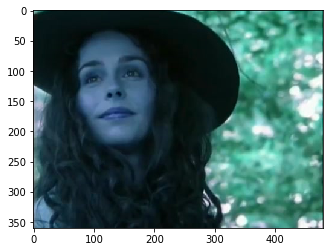

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("frames/_a9SWtcaNj8.mp4/022.jpg",cv2.IMREAD_COLOR) # reads image as grayscale
# plt.imshow(img)
# print(img.shape)
x_data = np.array( [np.array(cv2.imread(imagePath[i])) for i in range(len(imagePath))] )


In [0]:
s = "abc"
b = "def"
print(s+b)

abcdef


In [0]:
"%0.3d" % (1)

'001'